In [26]:
#%matplotlib inline
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from util_kw import count_words, get_words, scan_processed_with_phraser_
from collections import defaultdict, OrderedDict
import pandas as pd
import os
import matplotlib
import re

In [2]:
path_root_processed='./processedText'
path_models = './word2vec_models'
path_phraser_models='./phraser_models'

journal = 'IN-indianexpress-india'
path_journal_processed = path_root_processed +'/'+journal 

wvm = Word2Vec.load(path_models+'/'+journal+'_with_phraser').wv
#vocab = wvm.vocab
#all_words = [x for x in vocab.keys()]

In [3]:
journal_texts = scan_processed_with_phraser_(path_journal_processed, journal, path_phraser_models)

Launching scan of IN-indianexpress-india


In [4]:
def generate_time_series(words_and_weights):
    wc = count_words(journal_texts, words_and_weights)
    
    wc_summary = defaultdict(float)
    for date in wc.keys() :
        m = re.search('([0-9\-]+)\_', date)
        wc_summary[pd.to_datetime(m.group(1))] += wc[date]

    wc_ordered = OrderedDict(sorted(wc_summary.items()))
    ts_ret = pd.Series(wc_ordered.values(), index=wc_ordered.keys())
    return ts_ret

In [39]:
plt.rcParams["figure.figsize"] = (26,12)
font = {'weight' : 'bold',
        'size'   : 14}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=12)
matplotlib.rc('ytick', labelsize=12) 

In [40]:
kw1 = 'killing'
kw2 = 'dalits'
# get_words generates a dict with words as keys and weights/similarities with seed word as values
ts1 = generate_time_series(get_words(wvm, kw1))
ts2 = generate_time_series(get_words(wvm, kw2))
ts1 = ts1[1:]
ts2 = ts2[1:]

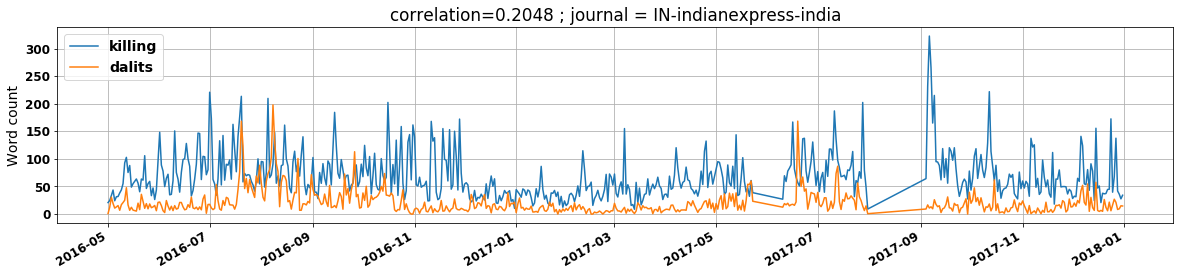

In [41]:
plt.figure(figsize=(20,4))
#ax = plt.gca()
ts1.plot(label=kw1)
ts2.plot(label=kw2)
titletxt = 'correlation='+ "{0:.4f}".format(ts1.corr(ts2,method='pearson')) +' ; journal = '+ journal
plt.title(titletxt)
plt.legend(loc='upper left')
plt.ylabel("Word count")
plt.grid(True)
plt.show()

In [51]:
kw1 = 'incident'
kw2 = 'obc'
ts3 = generate_time_series(get_words(wvm, kw1))
ts4 = generate_time_series(get_words(wvm, kw2))
# weird hack for getting rid of long Series .. check the data files
ts3 = ts3[1:]
ts4 = ts4[1:]

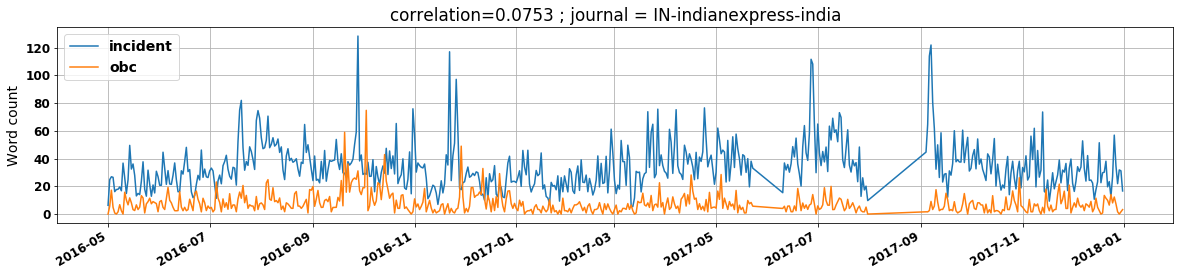

In [52]:
plt.figure(figsize=(20,4))
#ax = plt.gca()
ts3.plot(label=kw1)
ts4.plot(label=kw2)
titletxt = 'correlation='+ "{0:.4f}".format(ts3.corr(ts4,method='pearson')) +' ; journal = '+ journal
plt.title(titletxt)
plt.legend(loc='upper left')
plt.ylabel("Word count")
plt.grid(True)
plt.show()

In [44]:
ts1.shape, ts2.shape

((559,), (559,))